# Load Data

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.backends.backend_pdf
from sklearn.decomposition import PCA

import utils.EDA_SampleReaches_utils as SR

In [2]:
# adjust version 
# https://stackoverflow.com/questions/63329657/python-3-7-error-unsupported-pickle-protocol-5
isCorrectVersion = False

if isCorrectVersion:
    import pickle as pickle
    with open('Sample_Reaches.pkl', "rb") as fh:
        data = pickle.load(fh)
else:
    !pip3 install pickle5 
    import pickle5 as pickle
    #with open('DataFrames/Class_Total_Reaches.pkl', "rb") as fh:
    with open('DataFrames/Sample_Reaches.pkl', "rb") as fh:
        data = pickle.load(fh)

In [3]:
# PC's come from line 59 of ReachLoader (get_principal_components)
df = pd.DataFrame(data)
df = df.reset_index()
df.head()

,level_0,Trial,Date,Session,Rat,nose_vx,nose_vy,nose_vz,handle_vx,handle_vy,...,PC3,PCvar,Left_PC1,Left_PC2,Left_PC3,LeftPCVar,Right_PC1,Right_PC2,Right_PC3,RightPCVar
0,0,34,17,S1,16,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.233832,0.675203,-0.291558,-0.291558,-0.291558,0.784845,0.969779,-1.715657,0.491936,0.793948
1,1,34,17,S1,16,0.170638,-0.141462,0.302295,-0.003386,-0.001413,...,-0.291743,0.141802,-0.038295,-0.038295,-0.038295,0.091433,1.036623,-1.980362,0.881643,0.088562
2,2,34,17,S1,16,0.169689,-0.141407,0.302212,-0.002390,-0.001587,...,0.362608,0.039277,-1.064636,-1.064636,-1.064636,0.054789,0.280779,-0.538095,-0.014768,0.068060
3,3,34,17,S1,16,0.168460,-0.141163,0.301658,-0.001445,-0.001736,...,0.592453,0.037171,-1.292906,-1.292906,-1.292906,0.020458,0.160562,0.135441,-1.000430,0.028906
4,4,34,17,S1,16,0.166856,-0.140666,0.300472,-0.000567,-0.001848,...,0.341438,0.032877,-0.437332,-0.437332,-0.437332,0.011779,0.428855,-0.278145,-0.912786,0.009293


In [4]:
#Labels CSV file for reference
labels = pd.read_csv("DataFrames\LABELS.csv")
labels

,Unnamed: 0,Trial,Start Frame,Stop Frame,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,1,2.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,4,5.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,436,46.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
437,437,47.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
438,438,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
439,439,49.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0


In [5]:
describe_df = df.describe()
describe_df

,level_0,Trial,Rat,nose_vx,nose_vy,nose_vz,handle_vx,handle_vy,handle_vz,left_shoulder_vx,...,PC3,PCvar,Left_PC1,Left_PC2,Left_PC3,LeftPCVar,Right_PC1,Right_PC2,Right_PC3,RightPCVar
count,63557.000000,63557.000000,63557.000000,63557.000000,63557.000000,63557.000000,63557.000000,63557.000000,63557.000000,63557.000000,...,6.355700e+04,4330.000000,6.355700e+04,6.355700e+04,6.355700e+04,4330.000000,6.355700e+04,6.355700e+04,6.355700e+04,4330.000000
mean,119.905014,20.363705,14.338074,0.000250,0.002520,-0.005933,-0.010640,0.002302,-0.011627,0.002829,...,1.002072e-17,0.085694,5.818898e-18,5.818898e-18,5.818898e-18,0.096036,-2.243278e-17,6.449850e-18,-6.095496e-18,0.097727
std,122.288095,13.011250,2.229990,0.060148,0.071247,0.127158,0.032413,0.012346,0.036995,0.074431,...,9.965956e-01,0.148587,9.965956e-01,9.965956e-01,9.965956e-01,0.188054,9.965956e-01,9.965956e-01,9.965956e-01,0.194310
min,0.000000,0.000000,9.000000,-0.383527,-0.394044,-1.014668,-0.311955,-0.312933,-0.394053,-0.535389,...,-8.403271e+00,0.000569,-6.539694e+00,-6.539694e+00,-6.539694e+00,0.000241,-7.444313e+00,-1.174778e+01,-7.205554e+00,0.000117
25%,36.000000,9.000000,14.000000,-0.019686,-0.019820,-0.052302,-0.001588,-0.000293,-0.005988,-0.028540,...,-4.104267e-01,0.007351,-3.096324e-01,-3.096324e-01,-3.096324e-01,0.003254,-3.284958e-01,-2.788757e-01,-3.715669e-01,0.002938
50%,78.000000,19.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.000061,0.000000,...,-8.742827e-16,0.037255,2.649137e-17,2.649137e-17,2.649137e-17,0.020876,-2.010007e-16,1.371073e-16,-1.164873e-16,0.019092
75%,156.000000,31.000000,16.000000,0.021913,0.028227,0.042402,0.000209,0.001364,0.000684,0.029454,...,2.389602e-01,0.046204,2.165359e-01,2.165359e-01,2.165359e-01,0.084064,2.302107e-01,2.228126e-01,3.132849e-01,0.091707
max,658.000000,51.000000,16.000000,0.305335,0.572165,0.629947,0.263610,0.116603,0.497399,0.536896,...,1.046974e+01,0.850224,8.467021e+00,8.467021e+00,8.467021e+00,0.875340,1.071940e+01,1.234520e+01,1.657414e+01,0.900034


In [6]:
df

,level_0,Trial,Date,Session,Rat,nose_vx,nose_vy,nose_vz,handle_vx,handle_vy,...,PC3,PCvar,Left_PC1,Left_PC2,Left_PC3,LeftPCVar,Right_PC1,Right_PC2,Right_PC3,RightPCVar
0,0,34,17,S1,16,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.338317e-01,0.675203,-2.915584e-01,-2.915584e-01,-2.915584e-01,0.784845,9.697788e-01,-1.715657e+00,4.919359e-01,0.793948
1,1,34,17,S1,16,0.170638,-0.141462,0.302295,-0.003386,-0.001413,...,-2.917429e-01,0.141802,-3.829507e-02,-3.829507e-02,-3.829507e-02,0.091433,1.036623e+00,-1.980362e+00,8.816425e-01,0.088562
2,2,34,17,S1,16,0.169689,-0.141407,0.302212,-0.002390,-0.001587,...,3.626075e-01,0.039277,-1.064636e+00,-1.064636e+00,-1.064636e+00,0.054789,2.807787e-01,-5.380952e-01,-1.476754e-02,0.068060
3,3,34,17,S1,16,0.168460,-0.141163,0.301658,-0.001445,-0.001736,...,5.924533e-01,0.037171,-1.292906e+00,-1.292906e+00,-1.292906e+00,0.020458,1.605624e-01,1.354407e-01,-1.000430e+00,0.028906
4,4,34,17,S1,16,0.166856,-0.140666,0.300472,-0.000567,-0.001848,...,3.414379e-01,0.032877,-4.373318e-01,-4.373318e-01,-4.373318e-01,0.011779,4.288551e-01,-2.781449e-01,-9.127862e-01,0.009293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63552,110,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.187895e-01,NaN,2.649137e-17,2.649137e-17,2.649137e-17,NaN,-2.010007e-16,1.371073e-16,-1.164873e-16,NaN
63553,111,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.742827e-16,NaN,2.649137e-17,2.649137e-17,2.649137e-17,NaN,-2.010007e-16,1.371073e-16,-1.164873e-16,NaN
63554,112,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.742827e-16,NaN,2.649392e-17,2.649392e-17,2.649392e-17,NaN,-2.010006e-16,1.371073e-16,-1.164873e-16,NaN
63555,113,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,...,-8.705236e-16,NaN,2.649392e-17,2.649392e-17,2.649392e-17,NaN,-2.010006e-16,1.371073e-16,-1.164873e-16,NaN


# Preprocess

- Convert Types
- One hot
- remove uncnecessary columns

In [7]:
# Converts Date column to float-type to match labels dataset.
# Resets index so we can filter for index -- Trial, Date, Session and Rate
df["Date"] = df["Date"].astype(int)
df.head()

,level_0,Trial,Date,Session,Rat,nose_vx,nose_vy,nose_vz,handle_vx,handle_vy,...,PC3,PCvar,Left_PC1,Left_PC2,Left_PC3,LeftPCVar,Right_PC1,Right_PC2,Right_PC3,RightPCVar
0,0,34,17,S1,16,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.233832,0.675203,-0.291558,-0.291558,-0.291558,0.784845,0.969779,-1.715657,0.491936,0.793948
1,1,34,17,S1,16,0.170638,-0.141462,0.302295,-0.003386,-0.001413,...,-0.291743,0.141802,-0.038295,-0.038295,-0.038295,0.091433,1.036623,-1.980362,0.881643,0.088562
2,2,34,17,S1,16,0.169689,-0.141407,0.302212,-0.002390,-0.001587,...,0.362608,0.039277,-1.064636,-1.064636,-1.064636,0.054789,0.280779,-0.538095,-0.014768,0.068060
3,3,34,17,S1,16,0.168460,-0.141163,0.301658,-0.001445,-0.001736,...,0.592453,0.037171,-1.292906,-1.292906,-1.292906,0.020458,0.160562,0.135441,-1.000430,0.028906
4,4,34,17,S1,16,0.166856,-0.140666,0.300472,-0.000567,-0.001848,...,0.341438,0.032877,-0.437332,-0.437332,-0.437332,0.011779,0.428855,-0.278145,-0.912786,0.009293


In [8]:
# NaN Check (Before)
sum(df.isnull().any())

39

In [9]:
# Remove unecessary columns

# remove object, nan, and PC columns 
for col_name in df.columns:
    if (df.dtypes[col_name] == object) or ('PC' in col_name) or (df[col_name].isnull().any()):  
        if (col_name!= "Session") & (col_name!="response_sensor"):
            df = df.drop(col_name, axis=1)
            
# remove level_0
df = df.drop("level_0", axis=1)

In [10]:
# one hot response_sensor 
values = df["response_sensor"].values
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(values)

print(f"Label Encoded to: {integer_encoded}")

# replace df column 
df["response_sensor"] = integer_encoded

Label Encoded to: [2 2 2 ... 1 1 1]


In [11]:
df

,Trial,Date,Session,Rat,nose_vx,nose_vy,nose_vz,handle_vx,handle_vy,handle_vz,...,right_end_tip_pz,handle_moving_sensor,lick_beam,reward_zone,time_vector,lick_vector,response_sensor,x_rob,y_rob,z_rob
0,34,17,S1,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1,0.0,0,680.96,0.0,2,0.113123,0.130453,0.447631
1,34,17,S1,16,0.170638,-0.141462,0.302295,-0.003386,-0.001413,0.003898,...,0.416259,1,0.0,0,680.96,0.0,2,0.113281,0.130930,0.446955
2,34,17,S1,16,0.169689,-0.141407,0.302212,-0.002390,-0.001587,0.004822,...,0.416356,1,0.0,0,680.97,0.0,2,0.113438,0.130365,0.446754
3,34,17,S1,16,0.168460,-0.141163,0.301658,-0.001445,-0.001736,0.005683,...,0.416454,1,0.0,0,680.98,0.0,2,0.113896,0.131760,0.450319
4,34,17,S1,16,0.166856,-0.140666,0.300472,-0.000567,-0.001848,0.006460,...,0.416551,1,0.0,0,680.98,0.0,2,0.113589,0.131165,0.448598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63552,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0,0.0,0,91.58,0.0,1,0.115788,0.064604,0.458725
63553,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0,0.0,0,91.58,0.0,1,0.115330,0.064890,0.454463
63554,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0,0.0,0,91.59,0.0,1,0.115624,0.065110,0.461147
63555,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0,0.0,0,91.60,0.0,1,0.115002,0.063957,0.460247


In [12]:
# NaN Check (After)
sum(df.isnull().any())

0

In [13]:
# Drop uncessary label columns
labels = labels.drop(["Unnamed: 0", "Start Frame", "Stop Frame"], axis=1)

In [14]:
labels

,Trial,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Num Frames,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
1,2.0,0.0,0.0,0.0,1.0,0.0,0.0,17,S1,RM16,1.0,1.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,4.0,0.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,5.0,0.0,1.0,0.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
436,46.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
437,47.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0
438,48.0,0.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
439,49.0,1.0,0.0,1.0,0.0,0.0,0.0,19,S3,RM9,0.0,5.0


# Summary Statistics:

1) match each trial to its time series and label. 

    a) filterdf: define function that takes in trial IDs (rat, date, session, trial number) and returns a DataFrame of the time series (number of rows that match the trial IDs).
    
    b) iterate through each trial ID in the label df. find the corresponding time series in the feature df using filterdf. store each time series in a list. Result is a list of DataFrames where each dataframe corresponds to one trial in the label df (order matters). 

    CHECKS: make sure filterdf returns type DataFrame. filterdf should error when it cannot find the matching data. When comparing trial IDs from the label df to the feature df, make sure the format and types of the trial IDs are the same (e.g. rat in label df is str 'RM16' but rat in feature df is int 16).

2) Convert from continuous to Discrete - get 5, 25, 50, 75, 95 % for each time series

    a) match each trial to its time series (done above). 

    b) make a new df. populate with new feature columns and each row represents a trial.

    c) If the feature is a time series: take the sum stats for each df. store as new feature columns and rows. Else, store value in new df. 
    Result is a new df with reduced dimensionality (trials by features). i.e. gets rid of time.


In [15]:
# Select Columns to Use

selected_col_names = []
selected_col_names.extend(["Rat", "Session", "Trial", "Date"])
#for col in df.columns:
#    if ("wrist" in col) or ('forearm' in col) or ('palm' in col) or ('handle' in col) or ('nose' in col):
#        selected_col_names.append(col)

#selected_col_names

# SELECT ALL

# USE filtered data

In [17]:
#df = filteredData # SELECT ALL
df

,Trial,Date,Session,Rat,nose_vx,nose_vy,nose_vz,handle_vx,handle_vy,handle_vz,...,right_end_tip_pz,handle_moving_sensor,lick_beam,reward_zone,time_vector,lick_vector,response_sensor,x_rob,y_rob,z_rob
0,34,17,S1,16,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1,0.0,0,680.96,0.0,2,0.113123,0.130453,0.447631
1,34,17,S1,16,0.170638,-0.141462,0.302295,-0.003386,-0.001413,0.003898,...,0.416259,1,0.0,0,680.96,0.0,2,0.113281,0.130930,0.446955
2,34,17,S1,16,0.169689,-0.141407,0.302212,-0.002390,-0.001587,0.004822,...,0.416356,1,0.0,0,680.97,0.0,2,0.113438,0.130365,0.446754
3,34,17,S1,16,0.168460,-0.141163,0.301658,-0.001445,-0.001736,0.005683,...,0.416454,1,0.0,0,680.98,0.0,2,0.113896,0.131760,0.450319
4,34,17,S1,16,0.166856,-0.140666,0.300472,-0.000567,-0.001848,0.006460,...,0.416551,1,0.0,0,680.98,0.0,2,0.113589,0.131165,0.448598
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63552,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0,0.0,0,91.58,0.0,1,0.115788,0.064604,0.458725
63553,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0,0.0,0,91.58,0.0,1,0.115330,0.064890,0.454463
63554,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0,0.0,0,91.59,0.0,1,0.115624,0.065110,0.461147
63555,0,19,S3,9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.400000,0,0.0,0,91.60,0.0,1,0.115002,0.063957,0.460247


# Match with Labels

In [18]:
# SEPARATE EACH TRIAL'S TIME SERIES
# MATCH WITH LABELS

# get all trial IDS
trials = labels['Trial'].values
rats = labels['Rat'].values
sessions = labels['Session'].values
dates = labels['Date'].values

all_timeSeries = []
all_labels = []
# for each trial
for i in np.arange(labels.shape[0]):
    trial = trials[i]
    rat = rats[i]
    # convert to int
    if rat == "RM16":
        rat = 16
    if rat == "RM15":
        rat = 15
    if rat == "RM14":
        rat = 14
    if rat == "RM13":
        rat = 13
    if rat == "RM12":
        rat = 12
    if rat == "RM11":
        rat = 11
    if rat == "RM10":
        rat = 10
    if rat == "RM9":
        rat = 9
    session = sessions[i]
    date = dates[i]
    # find corresponding time series
    trial_df = SR.filterdf(df, trial, rat, session, date)
    if trial_df.shape[0] != 0: # if no error in finding df
        # drop trial ID columns
        trial_df = trial_df.drop(["Trial", "Date", "Session", "Rat"], axis=1)
        all_timeSeries.append(trial_df)


NO matching Trial was found for (0.0, 13, 'S3', 20)
NO matching Trial was found for (1.0, 13, 'S3', 20)
NO matching Trial was found for (2.0, 13, 'S3', 20)
NO matching Trial was found for (3.0, 13, 'S3', 20)
NO matching Trial was found for (4.0, 13, 'S3', 20)
NO matching Trial was found for (5.0, 13, 'S3', 20)
NO matching Trial was found for (6.0, 13, 'S3', 20)
NO matching Trial was found for (7.0, 13, 'S3', 20)
NO matching Trial was found for (8.0, 13, 'S3', 20)
NO matching Trial was found for (9.0, 13, 'S3', 20)
NO matching Trial was found for (10.0, 13, 'S3', 20)
NO matching Trial was found for (11.0, 13, 'S3', 20)
NO matching Trial was found for (12.0, 13, 'S3', 20)
NO matching Trial was found for (13.0, 13, 'S3', 20)
NO matching Trial was found for (14.0, 13, 'S3', 20)
NO matching Trial was found for (15.0, 13, 'S3', 20)
NO matching Trial was found for (16.0, 13, 'S3', 20)
NO matching Trial was found for (17.0, 13, 'S3', 20)
NO matching Trial was found for (18.0, 13, 'S3', 20)
NO 

# Convert from continuous to discrete

In [42]:
# Create empty dictionary 

data = {}

trial_df = all_timeSeries[0]
# for each column 
for col_name in trial_df.columns:
        #if (col_name=="Trial") | (col_name=='Rat') | (col_name=="Date") | (col_name=="Session"):
        #    data[f'{col_name}'] = []
        #else:
        data[f'{col_name}_p5'] = []
        data[f'{col_name}_p25'] = []
        data[f'{col_name}_p50'] = []
        data[f'{col_name}_p75'] = []
        data[f'{col_name}_p95'] = []


pd.DataFrame(data)

,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,nose_vy_p95,...,y_rob_p5,y_rob_p25,y_rob_p50,y_rob_p75,y_rob_p95,z_rob_p5,z_rob_p25,z_rob_p50,z_rob_p75,z_rob_p95


In [43]:
# Populate dictionary

# for each trial
for i in np.arange(len(all_timeSeries)):
    # add feature data
    trial_df = all_timeSeries[i]
    # for each column 
    for col_name in trial_df.columns:
        col = trial_df[col_name] # get column values
        col = col.dropna() # drop nans
        col = col.to_frame()
        len_col = len(col)
        
        #if (col_name=="Trial") | (col_name=='Rat') | (col_name=="Date") | (col_name=="Session"):
        #    val = col.values[0][0]
        #    data[f'{col_name}'].append(val)
        if len_col > 1: # is time series
            # Get summary stats
            p5 = np.percentile(col, 5)
            p25 = np.percentile(col, 25) # axis=0
            p50 = np.percentile(col, 50) # median
            p75 = np.percentile(col, 75)
            p95 = np.percentile(col, 95)
            
            # add values
            data[f'{col_name}_p5'].append(p5)
            data[f'{col_name}_p25'].append(p25)
            data[f'{col_name}_p50'].append(p50)
            data[f'{col_name}_p75'].append(p75)
            data[f'{col_name}_p95'].append(p95)  
            
        else:
            print("NOT TIME SERIES")
       # elif len_col == 1: # is already discrete
       #     val = col.values[0][0][()]
        

        
 


In [44]:
# Create discrete DF!
discrete_df = pd.DataFrame(data)
discrete_df

,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,nose_vy_p95,...,y_rob_p5,y_rob_p25,y_rob_p50,y_rob_p75,y_rob_p95,z_rob_p5,z_rob_p25,z_rob_p50,z_rob_p75,z_rob_p95
0,-0.035476,-0.014832,0.001239,0.006294,0.022321,-0.014059,-0.006005,-0.001494,0.009793,0.021333,...,0.166572,0.168006,0.168394,0.168803,0.169898,0.393390,0.396053,0.397078,0.397685,0.399236
1,-0.045250,-0.011618,0.007241,0.021920,0.039469,-0.032908,-0.018692,-0.004400,0.016925,0.037591,...,0.118931,0.119262,0.119440,0.119729,0.120152,0.447020,0.448481,0.448987,0.449361,0.449665
2,-0.036294,-0.016094,-0.001998,0.015953,0.030454,-0.028781,-0.007606,0.012587,0.026449,0.064482,...,0.119397,0.120237,0.120485,0.120695,0.121028,0.448677,0.450247,0.450663,0.450932,0.451604
3,-0.039694,-0.012562,0.002324,0.027734,0.067174,-0.038574,-0.023681,-0.008450,0.024671,0.044707,...,0.118274,0.120114,0.120551,0.121043,0.121983,0.444181,0.448774,0.450143,0.451004,0.452016
4,-0.051618,-0.002211,0.024441,0.057781,0.084840,-0.057600,-0.041750,-0.021137,0.005952,0.033178,...,0.138715,0.146647,0.157845,0.159046,0.160538,0.352072,0.354211,0.355657,0.376376,0.384446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.057490,0.062577,0.118079,0.120300,0.121256,0.400102,0.409177,0.449528,0.451257,0.457321
380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.063171,0.063710,0.064096,0.128646,0.132145,0.435032,0.449614,0.456722,0.457518,0.458682
381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.139492,0.140109,0.140662,0.141963,0.180167,0.397403,0.399714,0.400644,0.435467,0.621981
382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.133053,0.134456,0.134922,0.135403,0.155573,0.574477,0.612024,0.613420,0.613976,0.615383


# Save Discrete df as CSV

In [45]:
filename = "DataFrames/DISCRETE_DF.csv"  # file with no PCA standardized discrete features
discrete_df.to_csv(filename)

print("Done!")

Done!


# Add labels to discrete df

In [46]:
# Match and add labels 

# Remove unmatched labels (manual)
new_labels = labels.loc[(labels['Rat']!="RM13") | (labels["Session"]!="S3") | (labels['Date']!=20)]

# Remove non-class columns
new_labels.reset_index(inplace=True, drop=True)
new_labels

,Trial,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,1.0,0.0,0.0,0.0,1.0,0.0,17,S1,RM16,1.0,1.0
1,2.0,0.0,0.0,0.0,1.0,0.0,17,S1,RM16,1.0,1.0
2,3.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,4.0,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,5.0,0.0,1.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
379,46.0,1.0,0.0,1.0,0.0,0.0,19,S3,RM9,0.0,5.0
380,47.0,1.0,0.0,1.0,0.0,0.0,19,S3,RM9,0.0,5.0
381,48.0,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
382,49.0,1.0,0.0,1.0,0.0,0.0,19,S3,RM9,0.0,5.0


In [47]:
# Concat 
new_df = pd.concat([discrete_df, new_labels], axis=1)
new_df

,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,nose_vy_p95,...,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-0.035476,-0.014832,0.001239,0.006294,0.022321,-0.014059,-0.006005,-0.001494,0.009793,0.021333,...,0.0,0.0,0.0,1.0,0.0,17,S1,RM16,1.0,1.0
1,-0.045250,-0.011618,0.007241,0.021920,0.039469,-0.032908,-0.018692,-0.004400,0.016925,0.037591,...,0.0,0.0,0.0,1.0,0.0,17,S1,RM16,1.0,1.0
2,-0.036294,-0.016094,-0.001998,0.015953,0.030454,-0.028781,-0.007606,0.012587,0.026449,0.064482,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,-0.039694,-0.012562,0.002324,0.027734,0.067174,-0.038574,-0.023681,-0.008450,0.024671,0.044707,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,-0.051618,-0.002211,0.024441,0.057781,0.084840,-0.057600,-0.041750,-0.021137,0.005952,0.033178,...,0.0,1.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,1.0,0.0,0.0,19,S3,RM9,0.0,5.0
380,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,1.0,0.0,0.0,19,S3,RM9,0.0,5.0
381,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
382,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.0,0.0,1.0,0.0,0.0,19,S3,RM9,0.0,5.0


# Save Discrete df with labels as CSV

In [48]:
filename = "DataFrames/DISCRETE_andLABELS.csv"  # file with no PCA standardized discrete features with labels (top 3)
discrete_df.to_csv(filename)

print("Done!")

Done!


# EXPLORE

### Observe for null trials, the max palm vel should be around 0

In [49]:
temp = new_df.loc[new_df["Trial Type"]==1]
np.median(temp['left_palm_vx_p95']) # null

0.0

In [50]:
# GREATERTHAN LEFT PALM VX IN NULL TRIALS
temp = new_df.loc[new_df["Trial Type"]==0]
np.median(temp['left_palm_vx_p95']) # not null 

0.20764582507320842

### Observe successful single left handed reach trials should have a high max left hand palm velocity and low max right hand palm vel.

In [51]:
temp = new_df.loc[(new_df["Trial Type"]==0) & (new_df['Num Reaches']==0)]
np.median(temp['right_palm_vz_p95']) 

0.03527542677838887

In [52]:
# LEFT GENERALLY GREATER THAN RIGHT PAML VZ 
temp = new_df.loc[(new_df["Trial Type"]==0) & (new_df['Num Reaches']==0)]
np.median(temp['left_palm_vz_p95'])  

0.1279877358849825

# Why all the same value....?

In [53]:
# all single left reaches label (source from labels ipynb rm10_9_17_s2)
new_df.loc[(new_df['Rat']=="RM10") & (new_df["Session"]=="S2") & (new_df['Date']==17)]

,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,nose_vy_p95,...,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17,S2,RM10,1.0,1.0
327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17,S2,RM10,1.0,1.0
328,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17,S2,RM10,1.0,1.0
329,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17,S2,RM10,1.0,1.0
330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17,S2,RM10,1.0,1.0
331,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17,S2,RM10,1.0,1.0
332,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,17,S2,RM10,1.0,1.0


In [54]:
###############################################################################################################

# PCA

In [55]:
# datastructure to add figures to save 
figures = []

# Standardize Data

In [56]:
## Standardizing the features
"""
Each feature of your data should be normally distributed 
such that it will scale the distribution to a mean of zero and a standard deviation of one.
"""
discrete_df2 = StandardScaler().fit_transform(discrete_df)
discrete_df = pd.DataFrame(discrete_df2, columns = discrete_df.columns)
discrete_df

,nose_vx_p5,nose_vx_p25,nose_vx_p50,nose_vx_p75,nose_vx_p95,nose_vy_p5,nose_vy_p25,nose_vy_p50,nose_vy_p75,nose_vy_p95,...,y_rob_p5,y_rob_p25,y_rob_p50,y_rob_p75,y_rob_p95,z_rob_p5,z_rob_p25,z_rob_p50,z_rob_p75,z_rob_p95
0,0.303460,0.196227,-0.075244,-0.643774,-0.657679,0.713862,0.539785,-0.033041,-0.497934,-0.649215,...,0.939046,0.889345,0.817477,0.751204,0.666086,-0.495244,-0.538394,-0.577915,-0.630538,-0.674441
1,0.146381,0.286327,0.175489,-0.207842,-0.381464,0.465397,0.233983,-0.136813,-0.313105,-0.395314,...,-0.176857,-0.268792,-0.338071,-0.389292,-0.465050,0.353333,0.279199,0.237304,0.176340,0.095649
2,0.290325,0.160846,-0.210504,-0.374309,-0.526685,0.519805,0.501198,0.469802,-0.066238,0.024623,...,-0.165942,-0.245629,-0.313407,-0.366850,-0.445143,0.379555,0.306745,0.263613,0.200874,0.125262
3,0.235669,0.259882,-0.029941,-0.045668,0.064805,0.390715,0.113716,-0.281468,-0.112323,-0.284189,...,-0.192233,-0.248561,-0.311844,-0.358770,-0.423433,0.308425,0.283773,0.255450,0.202004,0.131547
4,0.044016,0.550063,0.894081,0.792536,0.349374,0.139912,-0.321852,-0.734535,-0.597504,-0.464234,...,0.286556,0.381861,0.568477,0.524444,0.453246,-1.149000,-1.190903,-1.228420,-0.963270,-0.900296
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,0.873654,0.612063,-0.127027,-0.819347,-1.017232,0.899191,0.684545,0.020300,-0.751757,-0.982359,...,-1.615995,-1.615603,-0.370180,-0.376030,-0.439949,-0.389036,-0.333722,0.245790,0.205953,0.212565
380,0.873654,0.612063,-0.127027,-0.819347,-1.017232,0.899191,0.684545,0.020300,-0.751757,-0.982359,...,-1.482914,-1.588680,-1.644443,-0.182064,-0.192366,0.163649,0.296879,0.358769,0.303707,0.233353
381,0.873654,0.612063,-0.127027,-0.819347,-1.017232,0.899191,0.684545,0.020300,-0.751757,-0.982359,...,0.304749,0.226514,0.162873,0.127421,0.899580,-0.431733,-0.481305,-0.521916,-0.040601,2.727058
382,0.873654,0.612063,-0.127027,-0.819347,-1.017232,0.899191,0.684545,0.020300,-0.751757,-0.982359,...,0.153936,0.092207,0.027390,-0.025031,0.340342,2.370070,2.829599,2.819684,2.746677,2.626311


# Visualize PCA

In [77]:
# https://plotly.com/python/pca-visualization/
data = pd.DataFrame(discrete_df, columns = discrete_df.columns)

pca = PCA(n_components=200)
pca.fit_transform(discrete_df)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)

fig = px.area(
    x=range(1, exp_var_cumul.shape[0] + 1),
    y=exp_var_cumul,
    labels={"x": "# Components", "y": "Explained Variance"}
)

fig.show()

## Save plotly figure as pdf

In [58]:
fig.write_image("Plots\PCAComponentsVsVariance.pdf")

## More PCA visualizations

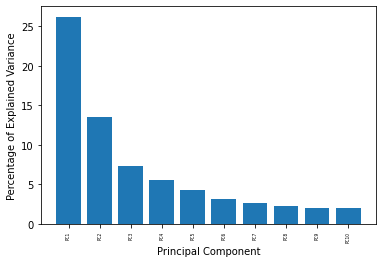

In [73]:
# PCA -- Bar Chart
data = pd.DataFrame(discrete_df, columns = discrete_df.columns)
pca = PCA(n_components=10)
pca.fit(discrete_df)
pca_data=pca.transform(data)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
xlabels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

fig = plt.figure()
figures.append(fig)
plt.rc("xtick", labelsize = 4.3)
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=xlabels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.xticks(rotation = 90)
plt.show()

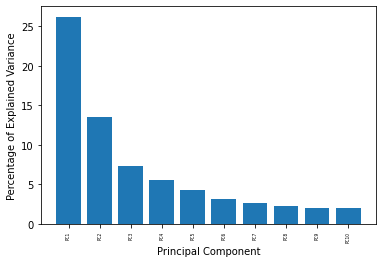

In [60]:
# PCA -- Bar Chart Specified
data = pd.DataFrame(discrete_df, columns = discrete_df.columns)
pca = PCA(n_components=10)
pca.fit(discrete_df)
pca_data=pca.transform(data)
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
xlabels = ["PC" + str(x) for x in range(1, len(per_var)+1)]

fig = plt.figure()
figures.append(fig)
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=xlabels)
plt.ylabel("Percentage of Explained Variance")
plt.xlabel("Principal Component")
plt.xticks(rotation = 90)
plt.show()

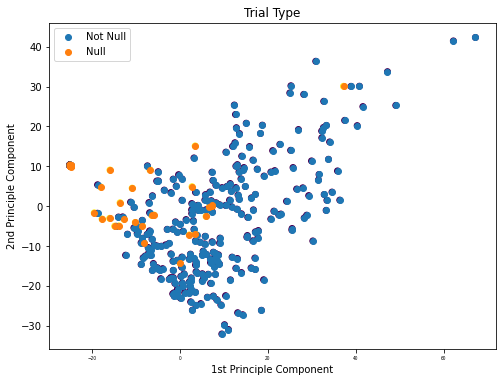

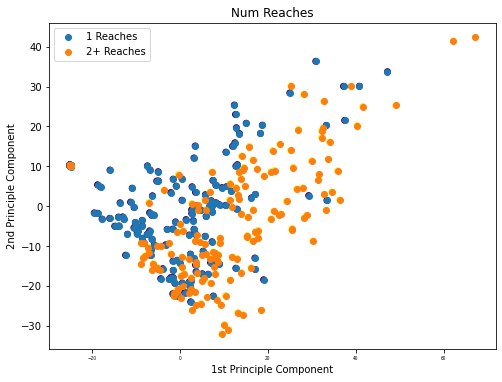

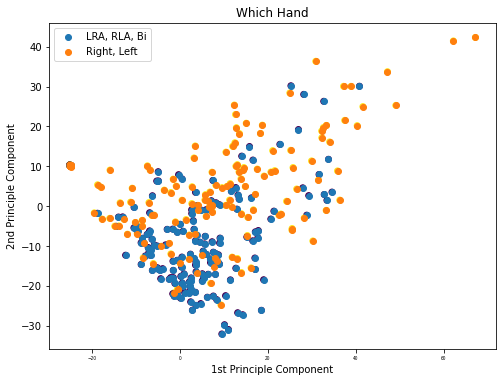

In [61]:
# PCA -- Scatter Plot (Experimental -- Ignore)
data = pd.DataFrame(discrete_df, columns=discrete_df.columns)
pca = PCA(n_components = 2)
pca.fit_transform(discrete_df)
PCA(copy=True, iterated_power="auto", n_components=76, random_state=None, svd_solver="auto", tol=0.0, whiten=False)
x_pca=pca.transform(data)
x_pca.shape

# plot
fig = plt.figure(figsize=(8,6))
figures.append(fig)
plt.scatter(x_pca[:,0],x_pca[:,1],c=new_df['Trial Type'])
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.title("Trial Type")
for label in np.unique(new_df['Trial Type']):
    plt.scatter(x_pca[new_df['Trial Type']==label, 0], x_pca[new_df['Trial Type']==label, 1], label=label)
L = plt.legend()
L.get_texts()[0].set_text('Not Null')
L.get_texts()[1].set_text('Null')

fig = plt.figure(figsize=(8,6))
figures.append(fig)
plt.scatter(x_pca[:,0],x_pca[:,1],c=new_df['Num Reaches'])
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component")
plt.title("Num Reaches")
for label in np.unique(new_df['Num Reaches']):
    plt.scatter(x_pca[new_df['Num Reaches']==label, 0], x_pca[new_df['Num Reaches']==label, 1], label=label)
L = plt.legend()
L.get_texts()[0].set_text('1 Reaches')
L.get_texts()[1].set_text('2+ Reaches')

fig = plt.figure(figsize=(8,6))
figures.append(fig)
plt.scatter(x_pca[:,0],x_pca[:,1],c=new_df['Which Hand'])
plt.xlabel("1st Principle Component")
plt.ylabel("2nd Principle Component");
plt.title("Which Hand")
for label in np.unique(new_df['Which Hand']):
    plt.scatter(x_pca[new_df['Which Hand']==label, 0], x_pca[new_df['Which Hand']==label, 1], label=label)
L = plt.legend()
L.get_texts()[0].set_text("LRA, RLA, Bi")
L.get_texts()[1].set_text('Right, Left')

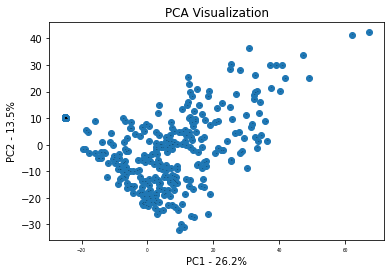

In [62]:
#PCA Graph -- Scatter PC1 vs PC2
pca_df = pd.DataFrame(pca_data, columns=xlabels)

fig = plt.figure()
figures.append(fig)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title("PCA Visualization")
plt.xlabel("PC1 - {0}%".format(per_var[0]))
plt.ylabel("PC2 - {0}%".format(per_var[1]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]), fontsize=0)

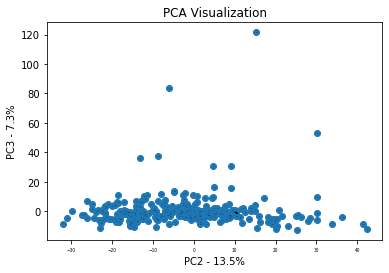

In [63]:
#PCA Graph -- Scatter #2 PC2 vs PC3
pca_df = pd.DataFrame(pca_data, columns=xlabels)

fig = plt.figure()
figures.append(fig)
plt.scatter(pca_df.PC2, pca_df.PC3)
plt.title("PCA Visualization")
plt.xlabel("PC2 - {0}%".format(per_var[1]))
plt.ylabel("PC3 - {0}%".format(per_var[2]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC2.loc[sample], pca_df.PC3.loc[sample]), fontsize=0)

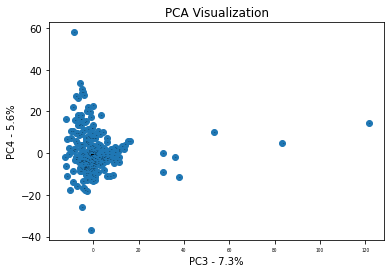

In [64]:
#PCA Graph -- Scatter #3 PC3 vs PC4
pca_df = pd.DataFrame(pca_data, columns=xlabels)

fig = plt.figure()
figures.append(fig)
plt.scatter(pca_df.PC3, pca_df.PC4)
plt.title("PCA Visualization")
plt.xlabel("PC3 - {0}%".format(per_var[2]))
plt.ylabel("PC4 - {0}%".format(per_var[3]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC3.loc[sample], pca_df.PC4.loc[sample]), fontsize=0)

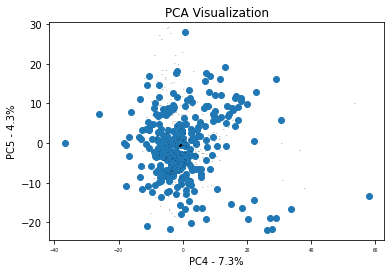

In [65]:
#PCA Graph -- Scatter #3 PC4 vs PC5
pca_df = pd.DataFrame(pca_data, columns=xlabels)

fig = plt.figure()
figures.append(fig)
plt.scatter(pca_df.PC4, pca_df.PC5)
plt.title("PCA Visualization")
plt.xlabel("PC4 - {0}%".format(per_var[2]))
plt.ylabel("PC5 - {0}%".format(per_var[4]))

for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC3.loc[sample], pca_df.PC4.loc[sample]), fontsize=0)

# Save PCA Data  as CSV

In [66]:
# take ~95% of explained variance so that is 50 components
# concat labels

pca = PCA(n_components=100)
components = pca.fit_transform(discrete_df)
PCA_col_names = ["PC" + str(x) for x in range(1, pca.n_components_+1)]
pca_df = pd.DataFrame(components, columns=PCA_col_names)

pca_df = pd.concat([pca_df, new_labels], axis=1)

pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,Trial Type,Num Reaches,Which Hand,Tug,Hand Switch,Date,Session,Rat,Nonbin Num Reaches,Nonbin Which Hand
0,-14.578559,-5.041855,-0.595268,-2.936764,-8.390312,7.490844,6.429889,-7.204945,-0.299799,2.578511,...,0.0,0.0,0.0,1.0,0.0,17,S1,RM16,1.0,1.0
1,4.716551,-0.941516,-1.802206,-7.256358,-1.455922,9.156361,1.579537,-8.533399,-1.667845,9.405195,...,0.0,0.0,0.0,1.0,0.0,17,S1,RM16,1.0,1.0
2,0.427181,6.857999,-2.140233,-8.167299,0.929359,0.864605,5.821072,2.325451,3.455134,-3.617788,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
3,-7.513167,-7.081834,-0.431055,-0.629572,-2.676139,4.936948,12.582419,-4.476204,-1.476270,-2.904616,...,0.0,0.0,0.0,0.0,0.0,17,S1,RM16,1.0,1.0
4,-8.309514,-9.211085,-1.785262,1.032228,-4.581666,5.661317,5.681253,-4.748942,-0.726019,0.850820,...,0.0,1.0,0.0,0.0,0.0,17,S1,RM16,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
379,-24.880454,10.076714,-0.891552,-0.484258,3.244830,-2.921296,-1.986072,0.335566,-0.144068,0.783222,...,1.0,0.0,1.0,0.0,0.0,19,S3,RM9,0.0,5.0
380,-24.914528,10.122275,-0.918055,-0.502231,3.247931,-2.953253,-1.985275,0.324028,-0.091390,0.798398,...,1.0,0.0,1.0,0.0,0.0,19,S3,RM9,0.0,5.0
381,-25.035004,10.256905,-1.045083,-0.605819,3.279838,-3.066576,-2.060773,0.395950,0.125602,1.019092,...,0.0,0.0,0.0,0.0,0.0,19,S3,RM9,1.0,1.0
382,-24.946927,10.232005,-0.963113,-0.503517,3.300784,-3.074417,-1.823509,0.169133,0.090363,0.773472,...,1.0,0.0,1.0,0.0,0.0,19,S3,RM9,0.0,5.0


In [67]:
discrete_df.shape

(384, 1345)

In [68]:
new_labels.shape

(384, 11)

In [69]:
# check there are no nan values
print(sum(discrete_df.isnull().any()))
print(sum(pca_df.isnull().any()))

0
0


In [70]:
filename = "DataFrames/PCA.csv"  
pca_df.to_csv(filename)

print("Done!")

Done!


# Save Plots as PDF

In [72]:
filename = "Plots\PCA.pdf"
SR.plt_to_pdf(figures, filename)

print("done!")

Figure(432x288)
Figure(432x288)
Figure(576x432)
Figure(576x432)
Figure(576x432)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
done!
